## Display a representation of the parameter with UMAP reducer 

Explanation about Umpa reducer 

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback

import pickle

import sys
sys.path.append('../Library')

import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import umap
import umap.plot
from pynndescent import NNDescent

2023-06-20 15:33:20.919670: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 15:33:21.004840: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 15:33:22.310565: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Preparation of the dataframes

In [2]:
# read the df day 3 from pickle
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Pickle/df_3days.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df = dataProcessing.rebalance_state(df,13)

First attempt to UMAP

In [4]:
reducer = umap.UMAP(n_neighbors=50,
                      min_dist=0.1)

In [5]:
df_feature, df_label = splitData.split_labels(df)
df_feature = df_feature.drop(['mouse'], axis=1)
df_feature_scaled = StandardScaler().fit_transform(df_feature)

In [6]:
embedding = reducer.fit_transform(df_feature_scaled)
embedding.shape

(773541, 2)

Text(0.5, 1.0, 'UMAP projection')

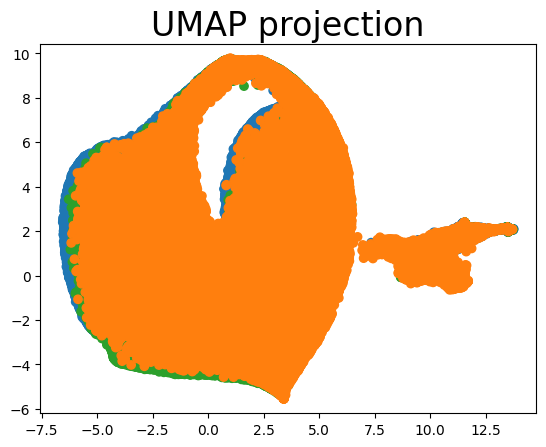

In [7]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_label.map({"w":1, "n":0, "r":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)

In [8]:
mapper = reducer.fit(df_feature_scaled)

<Axes: >

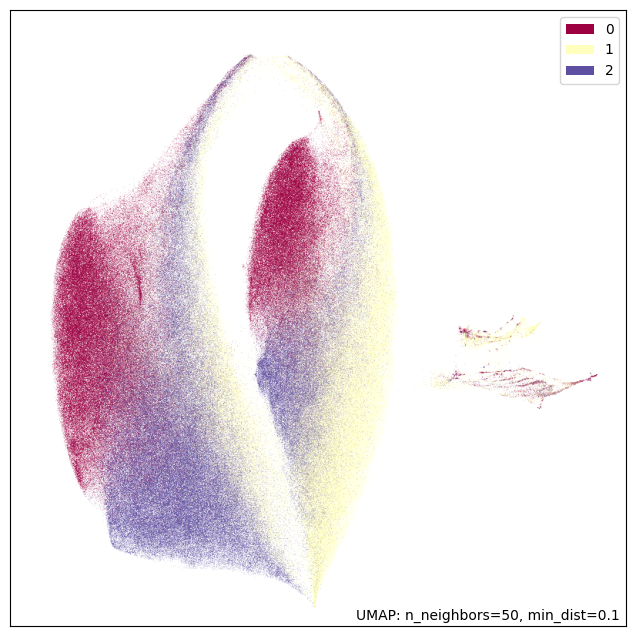

In [9]:
umap.plot.points(mapper, labels=df_label.map({"w":1, "n":0, "r":2}))

Umap only for the rem and the nrem

<Axes: >

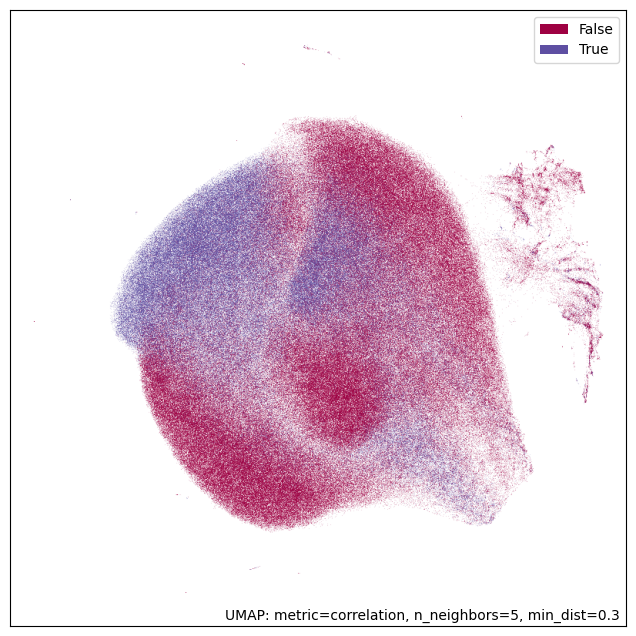

In [18]:
# plot the graph for the umap only for R state
umap.plot.points(mapper, labels=df_label.map({"w":1, "n":0, "r":2}) == 2)

<Axes: >

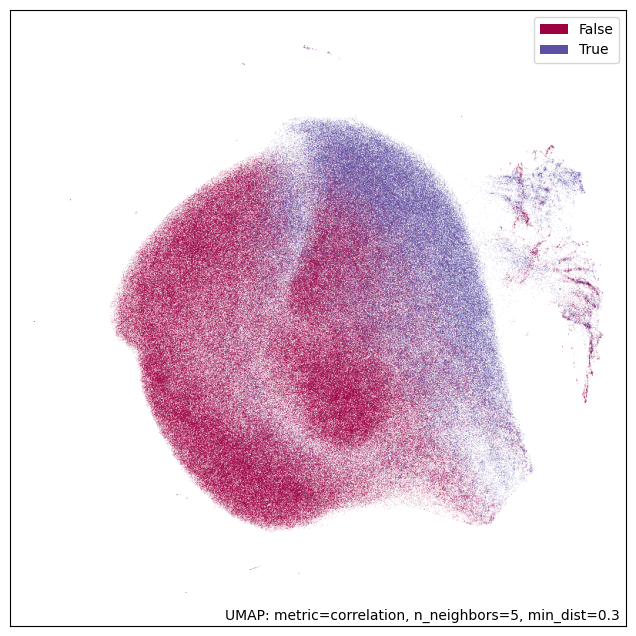

In [19]:
# plot the graph for the umap only for W state
umap.plot.points(mapper, labels=df_label.map({"w":1, "n":0, "r":2}) == 1)

<Axes: >

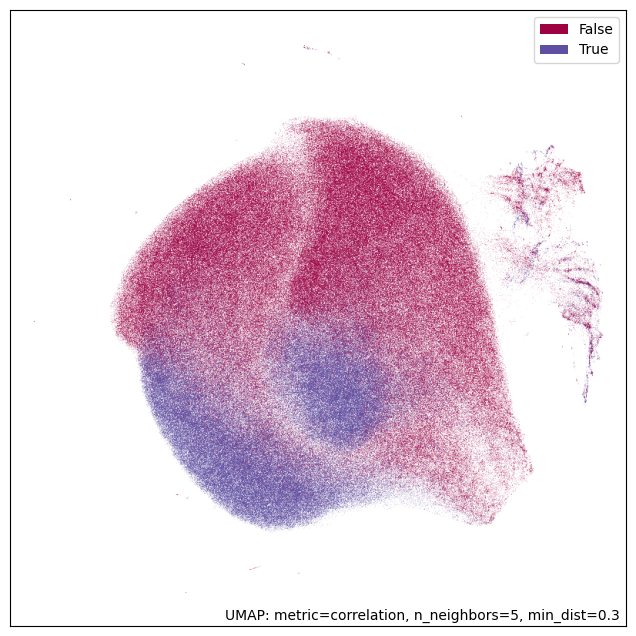

In [20]:
# plot the graph for the umap only for N state
umap.plot.points(mapper, labels=df_label.map({"w":1, "n":0, "r":2}) == 0)

<Axes: >

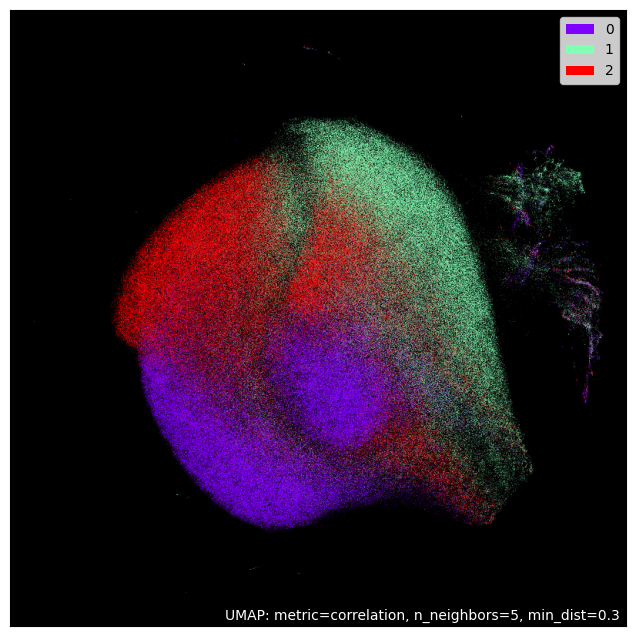

In [21]:
umap.plot.points(mapper, labels=df_label.map({"w":1, "n":0, "r":2}), theme='fire')